# Ex - 



### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called 

In [6]:
chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. 

In [8]:
print(chipo.shape[0])
print(chipo.shape[1])

4622
5


### Step 5. 

In [10]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. 

In [12]:
counts = chipo['item_name'].value_counts()
most_ordered_item= counts.idxmax()
most_ordered_count = counts.max()
print(most_ordered_item," ",most_ordered_count)

Chicken Bowl   726


### Step 7. 

In [14]:
chipo.sort_values(by='item_name')

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],$12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],$6.49
1849,749,1,6 Pack Soft Drink,[Coke],$6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],$6.49
2713,1076,1,6 Pack Soft Drink,[Coke],$6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",$8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",$8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


### Step 8. 

In [16]:
chipo['item_name'].nunique()

50

### Step 9. 

In [18]:
most_expensive_item = chipo[chipo['item_price'] == chipo['item_price'].max()]
quantity_ordered = most_expensive_item['quantity'].values[0]
print(quantity_ordered)

1


### Step 10. 

In [20]:
veggie_count = chipo[chipo['item_name'] == 'Veggie Salad Bowl'].shape[0]
print(veggie_count)

18


### Step 11. 

In [22]:
chipo[(chipo['item_name'] == 'Canned Soda')  & (chipo['quantity']>=2)].shape[0]

20

### Step 12. 

In [26]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(str(x).replace('$', '')))
count = chipo[chipo['item_price'] > 10.00].shape[0]
print(count)

1130


### Step 13. 

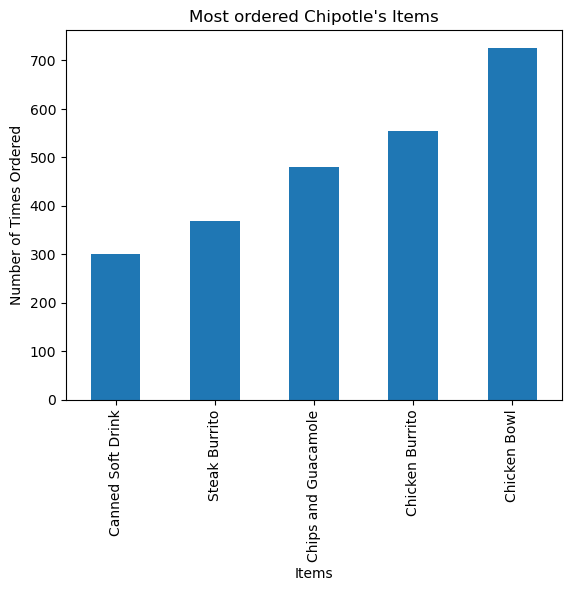

In [28]:
x = chipo.item_name
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df = df[0].sort_values(ascending = True)[45:50]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

### Step 14. 

<Axes: xlabel='item_price', ylabel='quantity'>

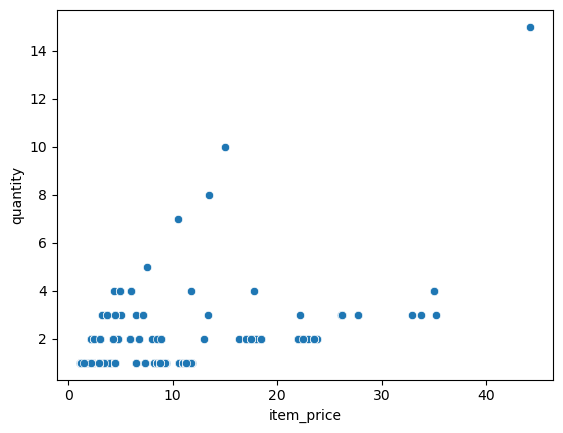

In [36]:
sns.scatterplot(x=chipo['item_price'], y=chipo['quantity'])

### Step 15. 

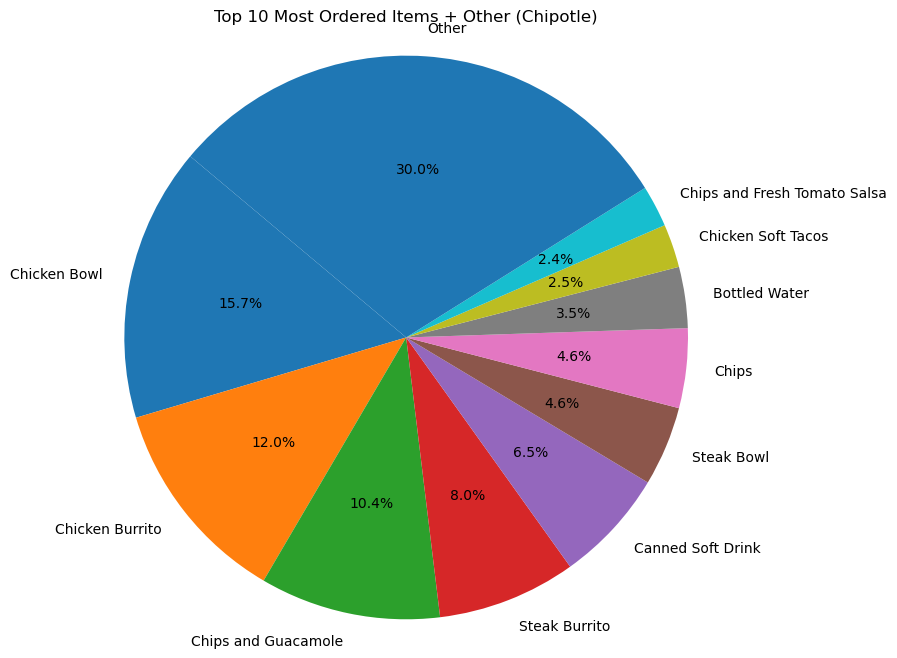

In [48]:
item_name_counts = chipo['item_name'].value_counts()
top_10 = item_name_counts.head(10)

other_sum = item_name_counts[10:].sum()
top_10['Other'] = other_sum

plt.figure(figsize=(8, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Ordered Items + Other (Chipotle)')
plt.axis('equal')
plt.show()


### Step 16. 

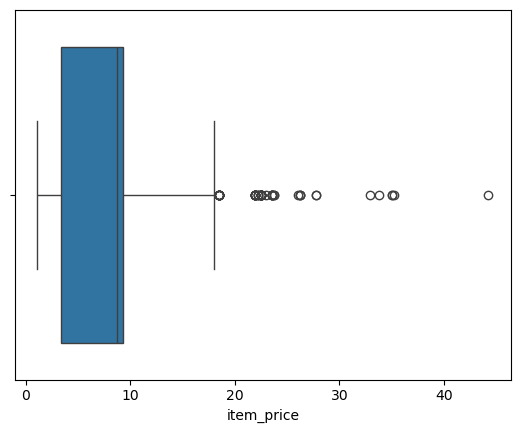

In [50]:
sns.boxplot(x=chipo['item_price'])
plt.show()

### BONUS: Create your own question and answer it.

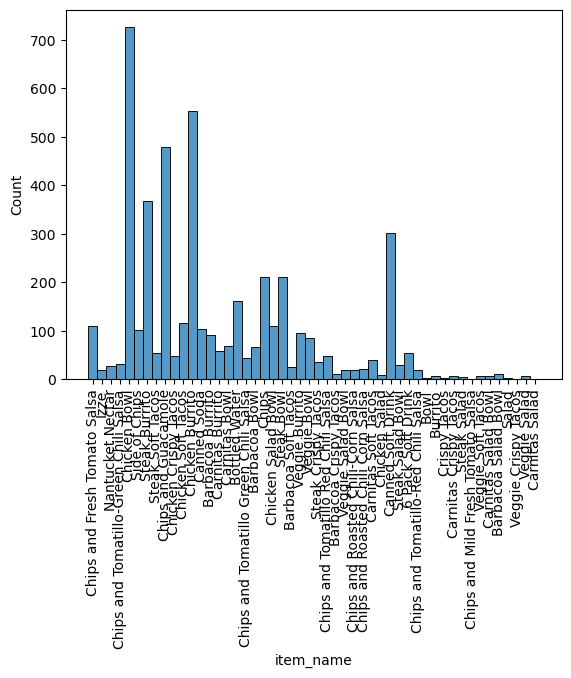

In [44]:
sns.histplot(x=chipo['item_name'])
plt.xticks(rotation=90)  
plt.show()